# Questão 1

In [1]:
import re

def is_password_strong(password):
    if len(password) < 8:
        return False

    if not re.search("[A-Z]", password) or not re.search("[a-z]", password):
        return False

    if not re.search("[0-9]", password):
        return False

    if not re.search("[!@#$%&*]", password):
        return False

    return True

In [2]:
print("Testing passwords:")

passwords_to_test = ["aaa", "123", "123456789", "password", "P@ssword", "P@ssw0rd"]

for i in range(len(passwords_to_test)):
    print("Testing password " + str(i+1) + ": " + passwords_to_test[i] + " - " + str(is_password_strong(passwords_to_test[i])))

Testing passwords:
Testing password 1: aaa - False
Testing password 2: 123 - False
Testing password 3: 123456789 - False
Testing password 4: password - False
Testing password 5: P@ssword - False
Testing password 6: P@ssw0rd - True


# Questão 2

In [3]:
def is_email_valid(email):
    pattern = r"^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$"

    if re.match(pattern, email):
        return True
    else:
        return False

In [4]:
print("Testing emails")

emails_to_test = ["email@gmail.com", "test.test@ic.ufal.br", "test+tag@hotmail.com", "test@domain", "test@domain..com", "@domain.com"]

for i in range(len(emails_to_test)):
    print("Testing email " + str(i+1) + ": " + emails_to_test[i] + " - " + str(is_email_valid(emails_to_test[i])))

Testing emails
Testing email 1: email@gmail.com - True
Testing email 2: test.test@ic.ufal.br - True
Testing email 3: test+tag@hotmail.com - True
Testing email 4: test@domain - False
Testing email 5: test@domain..com - True
Testing email 6: @domain.com - False


# Questão 3

In [5]:
def extract_book_reference(reference):
    authors_pattern = r"^(.*?)(?=\s\(\d{4}\))"
    authors = re.search(authors_pattern, reference)
    authors = authors.group(0) if authors else None

    year_pattern = r"\((\d{4})\)"
    year = re.search(year_pattern, reference)
    year = year.group(1) if year else None

    title_pattern = r"\)\.\s(.*?)(?=\.\s\w)"
    title = re.search(title_pattern, reference)
    title = title.group(1) if title else None

    publisher_pattern = r"\.\s([^\.]+)\.$"
    publisher = re.search(publisher_pattern, reference)
    publisher = publisher.group(1) if publisher else None

    return {
        "Authors": authors,
        "Year": year,
        "Title": title,
        "Publisher": publisher
    }

In [6]:
print("Testing book references:")

book_reference = "Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press."

print(extract_book_reference(book_reference))

Testing book references:
{'Authors': 'Manning, C. D., Manning, C. D., & Schutze, H.', 'Year': '1999', 'Title': 'Foundations of statistical natural language processing', 'Publisher': 'MIT press'}


# Questão 4

In [7]:
!wget https://github.com/WagnerAnth0ny/NLP/raw/master/Data/text_content.csv?download= -O text_content.csv

--2024-08-19 19:34:46--  https://github.com/WagnerAnth0ny/NLP/raw/master/Data/text_content.csv?download=
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/WagnerAnth0ny/NLP/master/Data/text_content.csv?download=true [following]
--2024-08-19 19:34:47--  https://media.githubusercontent.com/media/WagnerAnth0ny/NLP/master/Data/text_content.csv?download=true
Resolving media.githubusercontent.com (media.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148611910 (142M) [text/plain]
Saving to: ‘text_content.csv’

text_content.csv    100%[===================>] 141,73M  67,6MB/s    in 2,1s    

2024-08-19 19:34:58 (67,

In [8]:
!pip install pandas

In [9]:
import pandas as pd

df = pd.read_csv("text_content.csv")

In [10]:
df.head()

,url,desc,full_desc,requirements,popu_tags
0,https://store.steampowered.com/app/945360/Amon...,An online and local party game of teamwork and...,About This GamePlay with 4-10 player online or...,System RequirementsMinimum:OS: Windows 7 SP1+P...,MultiplayerOnline Co-OpSpaceSocial DeductionSu...
1,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,About This GameCounter-Strike: Global Offensiv...,System RequirementsWindowsMac OS XSteamOS + Li...,FPSShooterMultiplayerCompetitiveActionTeam-Bas...
2,https://store.steampowered.com/app/1097150/Fal...,Fall Guys is a massively multiplayer party gam...,About This GameFall Guys: Ultimate Knockout fl...,System RequirementsMinimum:Requires a 64-bit p...,MultiplayerFunnyBattle RoyaleOnline Co-OpFamil...
3,https://store.steampowered.com/app/1158310/Cru...,Paradox Development Studio brings you the sequ...,About This GameParadox Development Studio brin...,System RequirementsWindowsMac OS XSteamOS + Li...,StrategyRPGSimulationMedievalGrand StrategyHis...
4,https://store.steampowered.com/app/1085660/Des...,Destiny 2 is an action MMO with a single evolv...,About This GameDive into the world of Destiny ...,System RequirementsMinimum:Requires a 64-bit p...,Free to PlayLooter ShooterMultiplayerFPSAction...


In [11]:
df.describe()

,url,desc,full_desc,requirements,popu_tags
count,81048,80986,81048,81048,81048
unique,80893,40689,66421,46747,37842
top,https://store.steampowered.com/app/945360/Amon...,-,-,-,-
freq,3,31537,1812,6222,5764


In [12]:
df = df.dropna()

In [13]:
description = df["desc"]
full_description = df["full_desc"]

In [14]:
description_lenght_distribution = {}

for word in description:
    len_of_word = len(word.split())
    if len_of_word in description_lenght_distribution:
        description_lenght_distribution[len_of_word] += 1
    else:
        description_lenght_distribution[len_of_word] = 1

print(description_lenght_distribution)

{14: 643, 42: 1424, 29: 1035, 48: 1187, 22: 871, 28: 967, 51: 897, 57: 293, 16: 663, 45: 1407, 50: 968, 31: 1072, 23: 937, 39: 1249, 44: 1376, 20: 864, 38: 1297, 56: 353, 24: 971, 30: 1041, 1: 31905, 36: 1208, 43: 1371, 49: 1211, 40: 1258, 41: 1381, 27: 1033, 33: 1087, 52: 829, 46: 1304, 35: 1162, 32: 1111, 25: 1000, 47: 1177, 37: 1280, 9: 495, 13: 591, 21: 878, 55: 501, 53: 689, 10: 573, 26: 1009, 12: 592, 34: 1208, 15: 708, 8: 397, 7: 332, 19: 857, 17: 741, 6: 275, 11: 534, 54: 544, 18: 756, 4: 189, 58: 198, 60: 121, 64: 24, 63: 40, 61: 78, 59: 144, 5: 249, 65: 21, 3: 196, 62: 64, 2: 137, 66: 8, 69: 1, 67: 2, 68: 2}


In [15]:
full_description_lenght_distribution = {}

for word in full_description:
    len_of_word = len(word.split())
    if len_of_word in full_description_lenght_distribution:
        full_description_lenght_distribution[len_of_word] += 1
    else:
        full_description_lenght_distribution[len_of_word] = 1

print(full_description_lenght_distribution)

{206: 158, 136: 285, 157: 255, 335: 45, 390: 46, 287: 77, 250: 105, 262: 135, 236: 137, 180: 233, 171: 222, 395: 42, 240: 143, 521: 23, 352: 53, 532: 19, 485: 18, 309: 68, 463: 26, 321: 75, 756: 5, 277: 74, 269: 128, 59: 277, 30: 311, 190: 193, 213: 174, 264: 139, 393: 46, 328: 64, 146: 230, 414: 30, 471: 27, 396: 44, 310: 73, 358: 54, 215: 190, 138: 293, 214: 179, 128: 336, 152: 287, 306: 78, 400: 41, 451: 28, 89: 318, 234: 169, 1389: 2, 402: 28, 273: 97, 317: 83, 338: 73, 96: 311, 288: 112, 855: 4, 286: 80, 462: 24, 189: 207, 722: 3, 97: 321, 488: 25, 256: 111, 56: 260, 620: 6, 174: 219, 245: 159, 36: 265, 168: 239, 537: 10, 523: 19, 398: 46, 329: 51, 222: 152, 243: 136, 360: 46, 123: 313, 289: 107, 131: 297, 342: 56, 224: 159, 384: 36, 387: 57, 422: 41, 454: 27, 133: 276, 421: 27, 257: 134, 68: 290, 379: 36, 208: 201, 270: 140, 265: 96, 356: 49, 481: 18, 469: 22, 660: 9, 586: 15, 285: 115, 87: 267, 110: 321, 889: 4, 349: 62, 438: 28, 312: 73, 3: 366, 489: 20, 330: 67, 144: 225, 135:

In [16]:
!pip install matplotlib

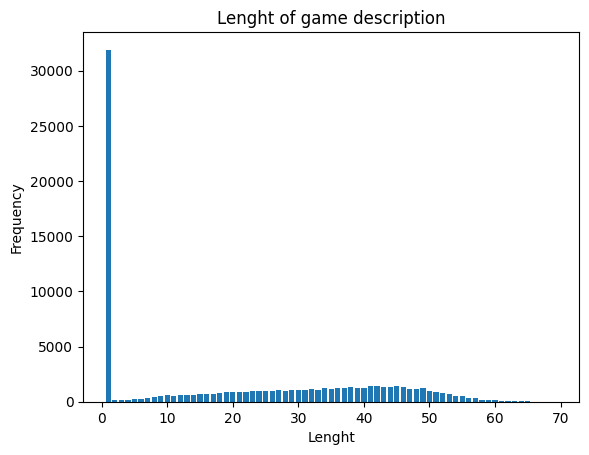

In [17]:
import matplotlib.pyplot as plt

keys = list(description_lenght_distribution.keys())
values = list(description_lenght_distribution.values())

plt.bar(keys, values)

plt.title("Lenght of game description")
plt.xlabel("Lenght")
plt.ylabel("Frequency")

plt.show()

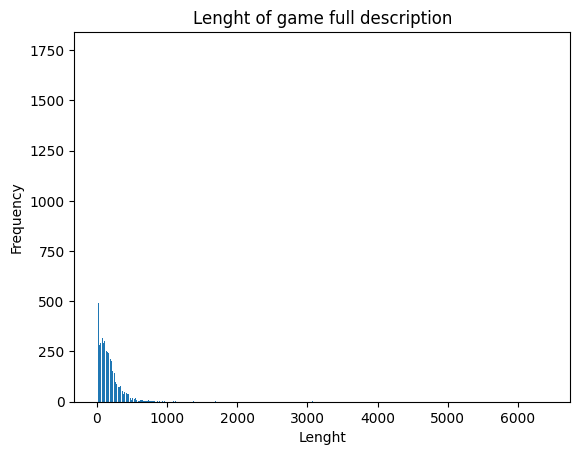

In [18]:
keys = list(full_description_lenght_distribution.keys())
values = list(full_description_lenght_distribution.values())

plt.bar(keys, values)

plt.title("Lenght of game full description")
plt.xlabel("Lenght")
plt.ylabel("Frequency")

plt.show()

# Questão 5

In [19]:
def process_text(text):
    text = re.sub(r'\b\w*[^a-zA-Z\s]\w*\b', '', text)

    text = re.sub(r'\b\w*\d\w*\b', '', text)

    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    text = ' '.join(text.split())

    return text

In [20]:
filtred_description = description.apply(process_text)
filtred_full_description = full_description.apply(process_text)

In [21]:
unique_words_description = {}

for text in filtred_description:
    words = text.split()
    for word in words:
        if word in unique_words_description:
            unique_words_description[word] += 1
        else:
            unique_words_description[word] = 1

In [22]:
unique_words_full_description = {}

for text in filtred_full_description:
    words = text.split()
    for word in words:
        if word in unique_words_full_description:
            unique_words_full_description[word] += 1
        else:
            unique_words_full_description[word] = 1

print(unique_words_full_description)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [23]:
print("Number of unique words in description: " + str(len(unique_words_description)))
print("Number of unique words in full description: " + str(len(unique_words_full_description)))

Number of unique words in description: 41951
Number of unique words in full description: 232113


In [24]:
def describe_text(text, word_to_index):
    description = {}
    words = text.split()
    for word in words:
        if word in word_to_index:
            if word in description:
                description[word] += 1
            else:
                description[word] = 1
    return description

In [25]:
converted_description_texts = []

for text in filtred_description:
    converted_description_texts.append(describe_text(text, unique_words_description))

print(filtred_description[0])
print(converted_description_texts[0])

an online and local party game of teamwork and betrayal for playersin space
{'an': 1, 'online': 1, 'and': 2, 'local': 1, 'party': 1, 'game': 1, 'of': 1, 'teamwork': 1, 'betrayal': 1, 'for': 1, 'playersin': 1, 'space': 1}


In [26]:
converted_full_description_texts = []

for text in filtred_full_description:
    converted_full_description_texts.append(describe_text(text, unique_words_full_description))

print(filtred_full_description[0])
print(converted_full_description_texts[0])

about this gameplay with player online or via local wifi as you attempt to prepare your spaceship for departure but beware as one or more random players among the crew are impostors bent on killing created as a party game we recommend playing with friends at a lan party or online using voice chat enjoy play between android ios and pc win by completing tasks to prepare the ship or ejecting all impostors react quickly to undo the sabotages check the admin map and security cameras to keep tabs on other crewmates report any dead bodies immediately to start discussion of who the suspected impostor is call emergency meetings to discuss suspicious behavior vote to eject suspected impostors kill crewmates and frame bystanders pretend to run tasks to blend in with the crewmates sneak through the vents to quickly move about the ship use sabotages to cause chaos and divide the crew close doors to trap victims and kill in customization pick your color and hat lots of game options add more impostor

## Dez palavras mais frequentes da base de dados

In [27]:
for word in sorted(unique_words_description, key=unique_words_description.get, reverse=True)[:10]:
    print(word)

the
and
a
of
to
in
is
you
your
game


In [28]:
for word in sorted(unique_words_full_description, key=unique_words_full_description.get, reverse=True)[:10]:
    print(word)

the
and
to
of
a
in
you
your
with
is


# Questão 6

In [29]:
!pip install nltk

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zadhart/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/zadhart/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/zadhart/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
def improved_text_processor(text):
    text_first_processed = process_text(text)

    words = word_tokenize(text_first_processed)

    stop_words = set(stopwords.words('english'))

    filtered_words = [word for word in words if word.lower() not in stop_words]

    final_text = ' '.join(filtered_words)

    return final_text

In [32]:
improved_filtred_description = description.apply(improved_text_processor)
improved_filtred_full_description = full_description.apply(improved_text_processor)

In [33]:
unique_words_improved_description = {}

for text in improved_filtred_description:
  words = text.split()

  for word in words:
    if word in unique_words_improved_description:
      unique_words_improved_description[word] += 1
    else:
      unique_words_improved_description[word] = 1

In [34]:
unique_words_improved_full_description = {}

for text in improved_filtred_full_description:
  words = text.split()

  for word in words:
    if word in unique_words_improved_full_description:
      unique_words_improved_full_description[word] += 1
    else:
      unique_words_improved_full_description[word] = 1

print(unique_words_improved_full_description)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [35]:
print("Number of unique words in description: " + str(len(unique_words_improved_description)))
print("Number of unique words in full description: " + str(len(unique_words_improved_full_description)))

Number of unique words in description: 41809
Number of unique words in full description: 231969


## Dez palavras mais frequentes da base de dados

In [36]:
for word in sorted(unique_words_improved_description, key=unique_words_improved_description.get, reverse=True)[:10]:
    print(word)

game
world
new
play
adventure
way
action
one
time
experience


In [37]:
for word in sorted(unique_words_improved_full_description, key=unique_words_improved_full_description.get, reverse=True)[:10]:
    print(word)

game
new
world
one
play
time
different
use
unique
players


## Dez palavras mais frequentes usando a base de dados stemizada

In [38]:
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize

nltk.download('rslp')

stemmer = RSLPStemmer()

[nltk_data] Downloading package rslp to /home/zadhart/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [39]:
stemmed_filtred_description = []
stemmed_filtred_full_description = []

In [40]:
for word in improved_filtred_description:
    if word:
      stemmed_filtred_description.append(stemmer.stem(word))

for word in improved_filtred_full_description:
    if word:
      stemmed_filtred_full_description.append(stemmer.stem(word))

In [41]:
unique_words_improved_description = {}

for text in stemmed_filtred_description:
  words = text.split()

  for word in words:
    if word in unique_words_improved_description:
      unique_words_improved_description[word] += 1
    else:
      unique_words_improved_description[word] = 1

In [42]:
unique_words_full_description

for text in stemmed_filtred_full_description:
  words = text.split()

  for word in words:
    if word in unique_words_improved_full_description:
      unique_words_improved_full_description[word] += 1
    else:
      unique_words_improved_full_description[word] = 1

In [43]:
for word in sorted(unique_words_improved_description, key=unique_words_improved_description.get, reverse=True)[:10]:
    print(word)

game
world
new
play
adventure
way
action
one
find
take


In [44]:
for word in sorted(unique_words_improved_full_description, key=unique_words_improved_full_description.get, reverse=True)[:10]:
    print(word)

game
new
world
one
play
time
different
use
unique
get


## Realizando a rolulacao de POS

In [45]:
!pip install numpy spacy

In [46]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.6 MB/s eta 0:00:00MB/s eta 0:00:0102
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [47]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [48]:
def pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

In [49]:
pos_tagged_description = []
pos_tagged_full_description = []

In [50]:
for word in stemmed_filtred_description:
    if word:
      pos_tagged_description.append(pos_tagging(word))

for word in stemmed_filtred_full_description:
    if word:
      pos_tagged_full_description.append(pos_tagging(word))

## Classes gramaticais mais frequentes

In [51]:
print(pos_tagged_description[0])

[('online', 'PROPN'), ('local', 'ADJ'), ('party', 'NOUN'), ('game', 'NOUN'), ('teamwork', 'NOUN'), ('betrayal', 'PROPN'), ('playersin', 'PROPN'), ('spac', 'PROPN')]


In [52]:
description_pos_counter = {}

for pos_tag in pos_tagged_description:
    for word, tag in pos_tag:
        if tag in description_pos_counter:
            description_pos_counter[tag] += 1
        else:
            description_pos_counter[tag] = 1

In [53]:
print(description_pos_counter)

{'PROPN': 79586, 'ADJ': 147784, 'NOUN': 445168, 'VERB': 184975, 'SCONJ': 1253, 'ADV': 26024, 'PRON': 3728, 'X': 917, 'NUM': 7428, 'DET': 1864, 'AUX': 5982, 'ADP': 9999, 'CCONJ': 589, 'PUNCT': 154, 'INTJ': 953, 'SYM': 57, 'PART': 102}


In [54]:
for tag in sorted(description_pos_counter, key=description_pos_counter.get, reverse=True)[:10]:
    print(tag)

NOUN
VERB
ADJ
PROPN
ADV
ADP
NUM
AUX
PRON
DET


In [55]:
full_description_pos_counter = {}

for pos_tag in pos_tagged_full_description:
    for word, tag in pos_tag:
        if tag in full_description_pos_counter:
            full_description_pos_counter[tag] += 1
        else:
            full_description_pos_counter[tag] = 1

In [56]:
print(full_description_pos_counter)

{'NOUN': 3516866, 'ADV': 269686, 'ADP': 86858, 'ADJ': 1211275, 'VERB': 1492791, 'NUM': 65099, 'PROPN': 651877, 'PART': 884, 'AUX': 54767, 'PRON': 35179, 'SCONJ': 16860, 'X': 6227, 'INTJ': 10167, 'DET': 24045, 'CCONJ': 6345, 'PUNCT': 810, 'SYM': 1402}


In [57]:
for tag in sorted(full_description_pos_counter, key=full_description_pos_counter.get, reverse=True)[:10]:
    print(tag)

NOUN
VERB
ADJ
PROPN
ADV
ADP
NUM
AUX
PRON
DET


## Utilizando CountVectorizer com similaridade do cosseno

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [59]:
import random

small_filtred_description = random.sample(stemmed_filtred_description, len(stemmed_filtred_description) // 2)
small_full_filtred_description = random.sample(stemmed_filtred_full_description, len(stemmed_filtred_full_description) // 2)

In [60]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(small_filtred_description)

In [64]:
def cossine_closest_document(doc_index, matrix):
    similarity_matrix = cosine_similarity(matrix)

    similarities = similarity_matrix[doc_index]
    
    # Set the similarity with itself to a very low value (so it's not selected)
    similarities[doc_index] = -1
    
    # Find the index of the most similar document
    closest_doc_index = np.argmax(similarities)
    
    print(f"Documento base: '{small_filtred_description[doc_index]}'\n")
    print("Documento mais semelhante:\n")
    print(f"Documento {closest_doc_index}: '{small_filtred_description[closest_doc_index]}' com similaridade de {similarities[closest_doc_index]:.2f}")

#### Observando o primeiro documento certamente o número de vezes que a palavra "way" apareceu influenciou o resultado

In [65]:
cossine_closest_document(0, X)

Documento base: 'lie blackmail steal way low road rookie agent noomi kovacs must navigate way world corporate espionage dark spy comedy set'

Documento mais semelhante:

Documento 19165: 'tomato way way' com similaridade de 0.38


#### O segundo documento provavelmente utilizou as palavras "world", "gold" e "game" para encontrar a similaridade

In [72]:
cossine_closest_document(678, X)

Documento base: 'helps super game bears buy strongest gold version gbc game consoles history world full death traps prevent buying gold gbc buy regular gbc unique gbc gold edition dangerous human world life game b'

Documento mais semelhante:

Documento 11008: 'want collect gold world game trolley gold gives opportunity' com similaridade de 0.43


#### O terceiro documento provavelmente utilizou as palavras: "society", "strategy" e "nations". Esse caso em específico mostra um bom resultado do algoritmo.

In [73]:
cossine_closest_document(323, X)

Documento base: 'welcome illuminati high council develop strategy infiltrate nations subvert via bribery seduction intimidation discover wields influence induct organization reshape society fit agend'

Documento mais semelhante:

Documento 17502: 'grand strategy game leading secret society ruled humankind shadows centuries rewrite history pull strings fate spread influence across globe shaping nations future century present day' com similaridade de 0.17


#### O quarto documento provavelmente utilizou as palavras: "baseball" e "game". Por isso temos uma similaridade alta

In [71]:
cossine_closest_document(555, X)

Documento base: 'endless baseball play baseball manage emotions tim'

Documento mais semelhante:

Documento 1013: 'experience feeling baseball slugger home baseball kings game experience baseball hitting play virtual reality applied realistic physical ball movement spinning' com similaridade de 0.44


#### O quinto documento provavelmente tem como palavras predominantes "vr" e "classic". Visto que não existem muitos jogos vr é de se esperar uma similaridade relativamente alta.

In [82]:
cossine_closest_document(789, X)

Documento base: 'rockabowling vr bowling game set classic rockabilly theme enjoy immersive visuals solid gameplay ears filled classic sounds rock'

Documento mais semelhante:

Documento 1362: 'classic strategy game comes vr challenge mind kinda like game currently features classic game modes well sandbox option' com similaridade de 0.35


## Utilizando TF-IDF com a similaridade do cosseno

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(small_filtred_description)

#### Nesse primeiro caso podemos ver uma grande diferenca entre o TF-IDF e o CountVectorizer visto que as palavras com mais peso aqui provavelmente são "spy" e "agent" (antes a palavra utilizada provavelmente foi "way"). Resultando em jogos muito mais parecidos.

In [76]:
cossine_closest_document(0, tfidf_matrix)

Documento base: 'lie blackmail steal way low road rookie agent noomi kovacs must navigate way world corporate espionage dark spy comedy set'

Documento mais semelhante:

Documento 5323: 'dash evade smash way truth corporate spy asaru reckless cia agent amelia uncover dark secrets negabot mega corporation save company hostile takeover assault spy stylish fast paced game dash comedy' com similaridade de 0.23


#### Nesse caso ambos algoritmos provavelmente colocaram pesos similares nas mesmas palavras e gerando o mesmo resultado

In [83]:
cossine_closest_document(678, tfidf_matrix)

Documento base: 'helps super game bears buy strongest gold version gbc game consoles history world full death traps prevent buying gold gbc buy regular gbc unique gbc gold edition dangerous human world life game b'

Documento mais semelhante:

Documento 11008: 'want collect gold world game trolley gold gives opportunity' com similaridade de 0.23


#### Nesse caso as prováveis palavras que foram usadas para decidir são: "strategy e "influence"|

In [84]:
cossine_closest_document(323, tfidf_matrix)

Documento base: 'welcome illuminati high council develop strategy infiltrate nations subvert via bribery seduction intimidation discover wields influence induct organization reshape society fit agend'

Documento mais semelhante:

Documento 9167: 'agenda strategy simulation game control independent agency set goal world domination try claim global influence power allies covert operations assassinations bribery fraud' com similaridade de 0.14


#### O número de vezes que a palavra "baseball" apareceu, junto com o fato de que não existem muitos jogos de bases justificam a alta similaridade

In [85]:
cossine_closest_document(555, tfidf_matrix)

Documento base: 'endless baseball play baseball manage emotions tim'

Documento mais semelhante:

Documento 1013: 'experience feeling baseball slugger home baseball kings game experience baseball hitting play virtual reality applied realistic physical ball movement spinning' com similaridade de 0.52


#### "bowling"e "vr" justificam a escolha visto que não existem muitos jogos de boliche e muitos jogos vr

In [86]:
cossine_closest_document(789, tfidf_matrix)

Documento base: 'rockabowling vr bowling game set classic rockabilly theme enjoy immersive visuals solid gameplay ears filled classic sounds rock'

Documento mais semelhante:

Documento 22740: 'pinheads bowling vr fun new way play classic game bowling animated pins sideline attractions create altogether unique bowling experienc' com similaridade de 0.26
